# Example fitting AWG to plunger factor

Many system have a bias T with attenuation on the fast, we need to find the factor from the AWG to the gate voltage.

The data can be acquried by making a scan xxxx. The function is `measure_awg_to_plunger`

In [1]:
%matplotlib inline
import os
import qtt
import pickle
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')

In [2]:
result = pickle.load(open(os.path.join(exampledatadir, 'misc', 'awg_to_plunger_scan.pickle'), 'rb') )
print(result)

{'type': 'awg_to_plunger', 'awg_to_plunger': None, 'dataset': DataSet:
   location = '2018-09-02/22-36-36_qtt_scan2Dfast'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RPl_y      | None         | (34,)
   Setpoint | RPl_x      | None         | (34, 1854)
   Measured | measured   | None         | (34, 1854)}


In [3]:
from qtt.algorithms.awg_to_plunger import measure_awg_to_plunger, analyse_awg_to_plunger, plot_awg_to_plunger

In [7]:
aresult=analyse_awg_to_plunger(result,fig=None)
print('correction to factor: %.3f'  % aresult['awg_to_plunger_correction'])

scanratio: 55.620
correction to factor: -0.900


In [ ]:
Why is the factor negative? We sho

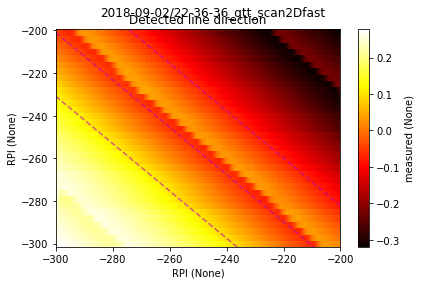

In [5]:
plot_awg_to_plunger(aresult, fig=100)